# Nearest Centroid Classification

The following example illustrates the nearest centroid classification algorithm on a number of different data sets.

In [4]:
# imports for plotting, numerical operations
import matplotlib.pylab as pl
import numpy as np
from numpy.random import multivariate_normal as mvn
%matplotlib inline

## Data Generation Functions

The following functions generate 
- two class data set with spherical covariance (uncorrelated data)
- two class data set with non-spherical covariance (correlated data)
- three class data set with non-spherical covariance (correlated data)


In [5]:
def make_data_threeclass(N=90):
    mu = np.array([[0,3],[0,-3],[2,1]]).T
    C = np.array([[5.,4.],[4.,5.]])
    n_samples_per_class = int(N/3)
    X = np.hstack((
        mvn(mu[:,0],C,n_samples_per_class).T,
        mvn(mu[:,1],C,n_samples_per_class).T,
        mvn(mu[:,2],C,n_samples_per_class).T))
    labels = np.ones(n_samples_per_class, dtype=int)
    y = np.hstack((labels,2*labels,3*labels))-1
    # generates some toy data
    return X.T,y.T

def make_data_twoclass(N=100):
    # generates some toy data
    mu = np.array([[0,3],[0,-3]]).T
    n_samples_per_class = int(N/2)
    C = np.array([[5.,4.],[4.,5.]])
    X = np.hstack((
            mvn(mu[:,0],C,n_samples_per_class).T, 
            mvn(mu[:,1],C,n_samples_per_class).T
        ))
    y = np.hstack((np.zeros((n_samples_per_class)),(np.ones((n_samples_per_class)))))
    return X.T,y.T
    

def make_data_spherical(N=100):
    # generates some toy data
    mu = np.array([[0,3],[0,-3]]).T
    n_samples_per_class = int(N/2)
    C = np.eye(2)
    X = np.hstack((
        mvn(mu[:,0],C,n_samples_per_class).T, 
        mvn(mu[:,1],C,n_samples_per_class).T
    ))
    y = np.hstack((np.zeros((n_samples_per_class)),(np.ones((n_samples_per_class)))))
    return X.T,y.T


def make_plot_nclass(X,y,mu=None):
    colors = "brymcwg"
    
    if mu is not None:
        # Plot the decision boundary.
        h = .02 # stepsize in mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        Z = predict_ncc(np.c_[xx.ravel(), yy.ravel()],mu)
        Z = Z.reshape(xx.shape)
        cs = pl.contourf(xx, yy, Z, cmap=pl.cm.Paired,alpha=.6)

    # plot the data
    for class_idx, class_name in enumerate(np.unique(y)):
        idx = y == class_name
        pl.plot(X[idx, 0], X[idx, 1], colors[int(class_idx)%6]+'o')
        if mu is not None:
            pl.plot(mu[class_idx, 0],mu[class_idx, 1],colors[int(class_idx)%6]+'o',markersize=20)

    pl.axis('tight')
    pl.xlabel('$X_1$')
    pl.ylabel('$X_2$')

## Example: Plotting some artificial data

We generate 100 2D data points with different means and spherical covariance and plot the data set.

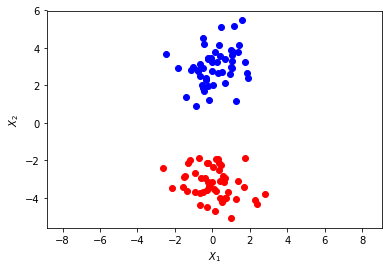

In [6]:
# generate some artificial data
X, Y = make_data_spherical()
make_plot_nclass(X,Y)
pl.axis('equal');

## Nearest Centroid Classification Algorithm

Implement the code stubs that perform nearest centroid classification training and prediction

In [7]:
def fit_ncc_didactic(X,Y):
    mu    = []
    for classname in np.unique(Y):          # goes through each unique class
        select     = (Y==classname)         # returns a bitmask, showes labels in Y belonging to current class
        X_class    = X[select,:]            # selects those X stored in bitmask
        mu_current = X_class.mean(axis=0)   # returns vector of means with each X
        mu.append(mu_current)               # appends to mu from previous loop cycle
    mu_np = np.array(mu)
    return mu_np

# if done in one line: 
# looks shorter and is faster 
# but the step by step version is easier to understand and more readable for a beginner
def fit_ncc(X,Y):
    return np.array([X[(Y==classname),:].mean(axis=0) for classname in np.unique(Y)])

    
def predict_ncc_didactic(X,mu):
    Y_predicted = []
    for x in X:
        deviation   = mu-x                                 # calculates deviations between all means and current datapoint x
        length      = np.linalg.norm(deviation, axis = 1)  # norms or computes the distances of of current datapoint to all means
        k           = np.argmin(length)                    # finds the shortest distance, therefore the class the datapoint belongs to
        Y_predicted.append(k)                              # appends to the list of all previous predictions 
    Y_predicted_np = np.array(Y_predicted)
    return Y_predicted_np

def predict_ncc(X,mu):
    return np.array([np.argmin(np.linalg.norm(mu-x, axis = 1)) for x in X])

import timeit
X, Y = make_data_spherical()
mu = fit_ncc(X,Y)
%timeit fit_ncc(X,Y)
%timeit fit_ncc_didactic(X,Y)
%timeit predict_ncc(X,mu)
%timeit predict_ncc_didactic(X,mu)

95.9 µs ± 18.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
86 µs ± 2.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.29 ms ± 220 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.96 ms ± 772 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Nearest Centroid Classification Application Example

The following cell runs three different examples and shows the classification of the NCC classifier

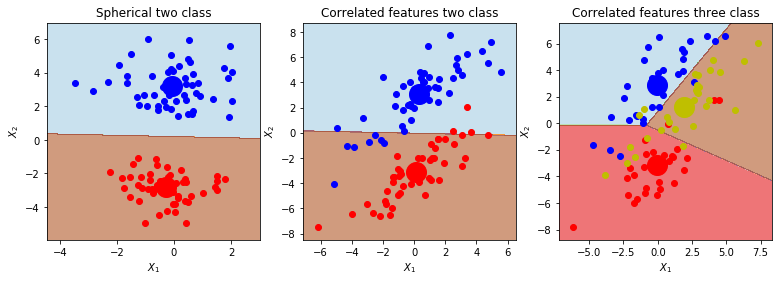

In [8]:
pl.figure(figsize=(13,4))

pl.subplot(1,3,1)
X, Y = make_data_spherical()
mu = fit_ncc(X,Y)
make_plot_nclass(X, Y, mu)
pl.title('Spherical two class')

pl.subplot(1,3,2)
X, Y = make_data_twoclass()
mu = fit_ncc(X,Y)
make_plot_nclass(X, Y, mu)
pl.title('Correlated features two class')

pl.subplot(1,3,3)
X, Y = make_data_threeclass()
mu = fit_ncc(X,Y)
make_plot_nclass(X, Y, mu)
pl.title('Correlated features three class');

In [9]:
# tests
X = np.array([[1,2],[3,4],[5,6],[7,8]])
Y = np.array([1,-1,1,-1])

mu = fit_ncc(X,Y)
print(mu)

predict_ncc(X,mu)


[[5. 6.]
 [3. 4.]]


array([1, 1, 0, 0], dtype=int64)